In [160]:
# Dataset: [Height_cm, Weight_kg]

dataset = [
    [45, 120], [48, 123], [50, 140], [52, 135], [55, 138],
    [56, 140], [58, 135], [60, 145], [62, 150], [65, 159],
    [68, 152], [70, 160], [72, 160], [74, 155], [76, 150],
    [77, 162], [78, 170], [78, 177], [80, 163], [82, 176],
    [83, 168], [85, 170], [86, 165], [87, 167], [88, 172],
    [90, 175], [92, 178], [94, 181], [95, 182], [96, 185],
    [98, 186], [100, 183], [102, 188], [105, 190], [50, 138],
    [52, 142], [57, 137], [61, 145], [66, 155], [69, 160],
    [71, 162], [74, 167], [79, 172], [84, 176], [89, 180],
    [93, 182], [60, 150], [63, 158], [67, 165], [73, 169],
    [81, 175], [87, 182], [91, 185], [95, 187], [100, 192]
]

In [161]:
height = [x[0] for x in dataset]
weight = [x[1] for x in dataset]

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [163]:
df = pd.DataFrame({'Height': height, "Weight" : weight})
df.head()

,Height,Weight
0,45,120
1,48,123
2,50,140
3,52,135
4,55,138


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  55 non-null     int64
 1   Weight  55 non-null     int64
dtypes: int64(2)
memory usage: 1012.0 bytes


In [165]:
df.describe()

,Height,Weight
count,55.000000,55.000000
mean,75.800000,163.254545
std,16.039765,18.096673
min,45.000000,120.000000
25%,62.500000,150.000000
50%,77.000000,165.000000
75%,88.500000,177.500000
max,105.000000,192.000000


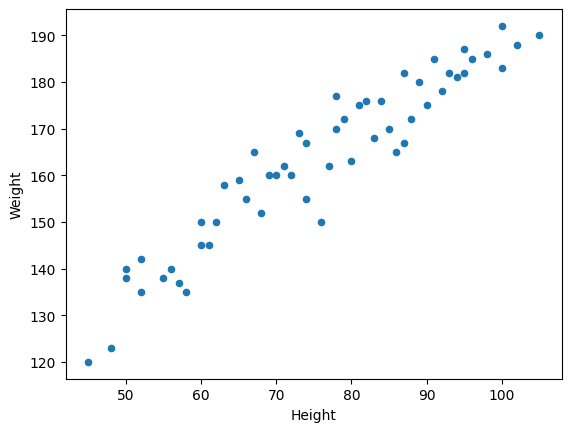

In [166]:
df.plot(kind='scatter', x='Height', y='Weight')
plt.show()

In [167]:
df.isnull().sum()

,0
Height,0
Weight,0


In [168]:
df.shape

(55, 2)

<br>

**Dividing the dataset into Independent and Dependent Feature**

In [169]:
X = df[['Height']]
y = df[['Weight']]

In [170]:
X.shape, y.shape

((55, 1), (55, 1))

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43)

In [172]:
X_train.shape,X_test.shape

((44, 1), (11, 1))

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
X_train, X_test

(array([[ 1.07909073],
        [ 0.11142785],
        [-0.85623503],
        [ 0.82104729],
        [-0.21112645],
        [-1.43683276],
        [ 1.40164502],
        [-0.79172418],
        [ 1.20811245],
        [-0.92074589],
        [ 1.14360159],
        [-0.53368074],
        [ 0.56300386],
        [-0.46916988],
        [-1.11427847],
        [-0.5981916 ],
        [ 0.43398214],
        [-0.40465902],
        [ 0.62751472],
        [ 0.17593871],
        [ 1.33713416],
        [ 0.88555815],
        [-0.14661559],
        [ 1.65968846],
        [ 0.30496042],
        [-0.72721332],
        [-0.01759387],
        [-1.56585448],
        [-1.6948762 ],
        [ 1.01457987],
        [-0.27563731],
        [-1.43683276],
        [ 1.33713416],
        [ 0.82104729],
        [ 1.53066674],
        [-0.92074589],
        [-1.56585448],
        [ 1.27262331],
        [ 0.24044956],
        [ 0.24044956],
        [ 0.69202558],
        [-0.08210473],
        [-1.88840878],
        [-1

In [175]:
X_train.mean()

np.float64(4.138104000875583e-16)

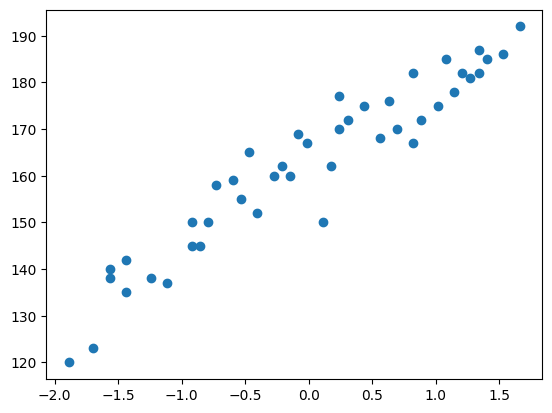

In [176]:
plt.scatter(X_train, y_train)

In [177]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

LinearRegression()

In [178]:
linear_regressor.intercept_, linear_regressor.coef_

(array([162.36363636]), array([[17.00540893]]))

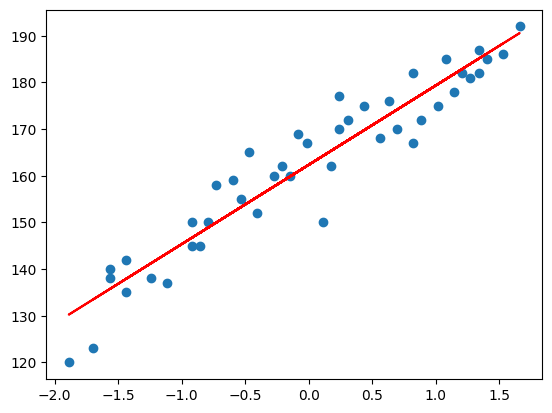

In [179]:
plt.scatter(X_train,y_train)
plt.plot(X_train, linear_regressor.predict(X_train),'r')

In [180]:
y_pred_test = linear_regressor.predict(X_test)

In [181]:
y_pred_test

array([[190.58731728],
       [175.22884781],
       [156.57927773],
       [178.51994841],
       [192.78138435],
       [170.84071367],
       [162.0644454 ],
       [168.6466466 ],
       [196.07248495],
       [142.31784179],
       [144.51190886]])

In [182]:
y_test

,Weight
31,183
22,165
39,160
44,180
32,188
19,176
13,155
18,163
33,190
5,140


In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

40.0075779209115
5.7519033846635015
6.325154379215697


In [184]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)
score

0.8721296178237019

In [186]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)



0.857921797581891